# Mean Shift

Este algoritmo es usado en aprendizaje no supervisado, No es parametrico puesto no genera un supuesto sobre las distribuciones subyacentes.

Este metodo considera el espacio como una función de desidad de probabilidad. En este caso si hay K grupos , entonces hay K picos(maximos locales) en la distribución.

Los puntos se moveran a la region que pertenecen segun los centroides moviendose a una región de mayor densidad 
de probabilidad.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [6]:
#Datos
X = np.loadtxt('data_clustering.txt',delimiter=',')

* Bandwidth(ancho de banda): Este parametro afecta la tasa de convergencia del algoritmo y el número de grupos, si el ancho de banda es pequeño puede resultar en demaciados grupos y  si es muy grande puede causar la fución de algunos grupos; por esto es cruial

* Quantile: impacta cómo se estima el ancho de banda. Un valor más alto paraCuantil aumentará el ancho de banda estimado, resultando en un menor número de grupos

In [9]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

#Entrenamiento de Mean Shift usando el ancho de banda estimado 
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

#Centros de grupos estimados
cluster_centers = meanshift_model.cluster_centers_
print('\nCentros de grupos:\n',cluster_centers)


Centros de grupos:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]


In [10]:
#Numero de grupos estimados
#etiquetas de datos
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumero de grupos en los datos de entrada=", num_clusters)


Numero de grupos en los datos de entrada= 5


Text(0.5, 1.0, 'Grupos')

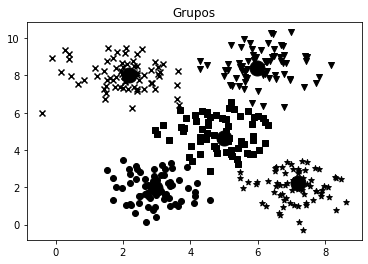

In [18]:
#Visualizar datos
plt.figure()
markers = 'o*xvs'

for i , markers in zip(range(num_clusters), markers):
    #Se ubican en el grafico los puntos del grupo actual
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=markers, color='black')
    #Se ubican los centros de los grupos
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', markerfacecolor='black', 
             markeredgecolor='black', markersize=15)
plt.title('Grupos')